# Exercice 1 : Optimisation d'une fonction simple

**Objectif** : Minimiser une fonction mathématique simple \( f(x) = (x - 3)^2 \) à l'aide d'un optimiseur PyTorch.

## Étapes :
1. Définis \( x \) comme une variable PyTorch entraînable.
2. Utilise une descente de gradient pour trouver la valeur de \( x \) qui minimise \( f(x) \).
3. Affiche la valeur optimisée de \( x \) après plusieurs itérations.


In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD

In [18]:
import torch
from torch.optim import SGD

# x as a trainable variable
x = torch.tensor([0.0], requires_grad=True)

# Optimizer
optimizer = SGD([x], lr=0.1)

num_iter = 100

for iter in range(num_iter):
    # fonction objectif
    f_x = (x - 3) ** 2

    # Calcul du gradient
    f_x.backward()

    # Mise à jour de x
    optimizer.step()

    optimizer.zero_grad()

    print(f"Iteration {iter+1}: x = {x.item():.4f}, f(x) = {f_x.item():.4f}")
    if abs(f_x)<0.0008:
        break 

print(f"\nValeur optimisée de x : {x.item():.4f}")


Iteration 1: x = 0.6000, f(x) = 9.0000
Iteration 2: x = 1.0800, f(x) = 5.7600
Iteration 3: x = 1.4640, f(x) = 3.6864
Iteration 4: x = 1.7712, f(x) = 2.3593
Iteration 5: x = 2.0170, f(x) = 1.5099
Iteration 6: x = 2.2136, f(x) = 0.9664
Iteration 7: x = 2.3709, f(x) = 0.6185
Iteration 8: x = 2.4967, f(x) = 0.3958
Iteration 9: x = 2.5973, f(x) = 0.2533
Iteration 10: x = 2.6779, f(x) = 0.1621
Iteration 11: x = 2.7423, f(x) = 0.1038
Iteration 12: x = 2.7938, f(x) = 0.0664
Iteration 13: x = 2.8351, f(x) = 0.0425
Iteration 14: x = 2.8681, f(x) = 0.0272
Iteration 15: x = 2.8944, f(x) = 0.0174
Iteration 16: x = 2.9156, f(x) = 0.0111
Iteration 17: x = 2.9324, f(x) = 0.0071
Iteration 18: x = 2.9460, f(x) = 0.0046
Iteration 19: x = 2.9568, f(x) = 0.0029
Iteration 20: x = 2.9654, f(x) = 0.0019
Iteration 21: x = 2.9723, f(x) = 0.0012
Iteration 22: x = 2.9779, f(x) = 0.0008

Valeur optimisée de x : 2.9779


# Exercice 2 : Ajuster une droite aux données

**Objectif** : Ajuster une ligne droite \( y = mx + c \) aux points de données générés artificiellement.

## Étapes :
1. Crée un ensemble de données en générant des points \( x \) et \( y \) avec du bruit aléatoire.
2. Implémente un modèle PyTorch simple pour prédire \( y \) à partir de \( x \) (paramètres \( m \) et \( c \)).
3. Utilise une fonction de perte MSE et optimise \( m \) et \( c \).


In [35]:
import matplotlib.pyplot as plt

In [52]:
x = torch.randn(100)
epsilon = torch.rand(100)
y = 2 * x + epsilon

# Trainable Params
alpha = nn.Parameter(torch.tensor(0.1, requires_grad=True))
beta = nn.Parameter(torch.tensor(0.2, requires_grad=True))

# lists of diff values saved

alphas = []
betas = []

# Optimiseur
optimizer = SGD([alpha, beta], lr=0.0001)

for epoch in range(200):
    total_loss = 0.0

    for iteration in range(len(x)):
        x_i = x[iteration]
        y_i = y[iteration]

        pred_i = alpha + beta * x_i

        loss = (y_i - pred_i) ** 2

        loss.backward()
        total_loss += loss.item()

    optimizer.step()
    optimizer.zero_grad()

    # save differents values of alpha and beta
    alphas.append(alpha.item())
    betas.append(beta.item())

    print(
        f"Époque {epoch + 1:02d}: alpha = {alpha.item():.4f}, beta = {beta.item():.4f}, erreur totale = {total_loss:.4f}"
    )


Époque 01: alpha = 0.1082, beta = 0.2391, erreur totale = 373.3754
Époque 02: alpha = 0.1162, beta = 0.2774, erreur totale = 357.5890
Époque 03: alpha = 0.1240, beta = 0.3148, erreur totale = 342.4837
Époque 04: alpha = 0.1316, beta = 0.3514, erreur totale = 328.0302
Époque 05: alpha = 0.1390, beta = 0.3872, erreur totale = 314.2004
Époque 06: alpha = 0.1463, beta = 0.4222, erreur totale = 300.9673
Époque 07: alpha = 0.1534, beta = 0.4565, erreur totale = 288.3051
Époque 08: alpha = 0.1603, beta = 0.4900, erreur totale = 276.1893
Époque 09: alpha = 0.1671, beta = 0.5228, erreur totale = 264.5962
Époque 10: alpha = 0.1737, beta = 0.5549, erreur totale = 253.5033
Époque 11: alpha = 0.1801, beta = 0.5863, erreur totale = 242.8890
Époque 12: alpha = 0.1864, beta = 0.6170, erreur totale = 232.7326
Époque 13: alpha = 0.1925, beta = 0.6471, erreur totale = 223.0145
Époque 14: alpha = 0.1985, beta = 0.6765, erreur totale = 213.7156
Époque 15: alpha = 0.2044, beta = 0.7052, erreur totale = 204.

Text(0.5, 1.0, 'Alpha estimation evolution')

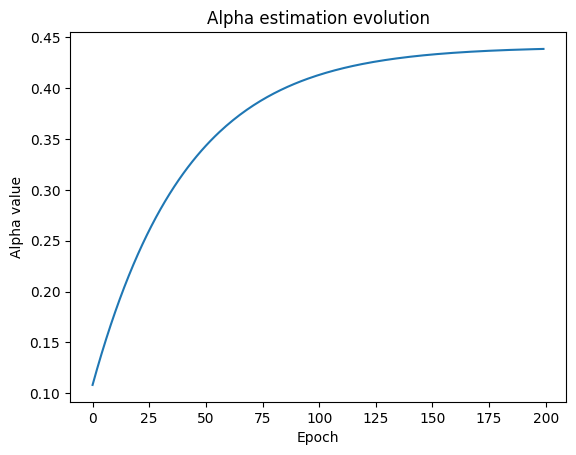

In [55]:
# plot estimation progress
plt.plot(alphas)
plt.xlabel("Epoch")
plt.ylabel("Alpha value")
plt.title("Alpha estimation evolution")

Text(0.5, 1.0, 'Alpha estimation evolution')

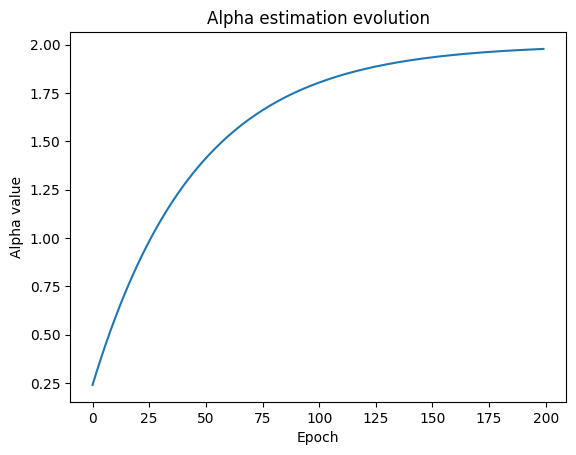

In [56]:
# plot estimation progress
plt.plot(betas)
plt.xlabel("Epoch")
plt.ylabel("Alpha value")
plt.title("Alpha estimation evolution")